In [33]:
import cv2
import numpy as np

from moviepy.editor import VideoFileClip
from scipy.misc import imresize


from matplotlib import pyplot
from matplotlib.pyplot import imshow, figure 

import IPython.display as display
from PIL import Image

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

In [36]:
class spriteboard:
    def __init__(self):
        path = "/home/strider/Code/robotron/resources/images/enemies/"
        # Filename, Value
        sprites = (
            ("brain.jpg", (28, 119, 195)),
            ("enforcer.jpg", (57, 169, 219)),
            ("enforcer2.jpg", (57, 169, 219)),
            ("grunt.jpg", (64, 188, 216)),
            ("hulk.jpg", (243, 146, 55)),
            ("hulk2.jpg", (243, 146, 55)),
            ("hulk3.jpg", (243, 146, 55)),
            ("hulk4.jpg", (243, 146, 55)),
            ("sphere.jpg", (214, 50, 48)),
            
            ("block.jpg", (35, 28, 7)),
            ("bullet.jpg", (57, 42, 22)),
            ("bullet2.jpg", (57, 42, 22)),
            ("electro.jpg", (99, 65, 51)),
            ("halfblock.jpg", (184, 111, 82)),
            ("star.jpg", (247, 135, 100)),
            
            ("man.jpg", (255, 0, 0)),
            ("girl.jpg", (255, 0, 0)),
            
            ("player.jpg", (0, 0, 255)),
            ("player2.jpg", (0, 0, 255))
        )
        self.enemies = []

        for filename, color in sprites:
            image = cv2.imread(path + filename, 0)
            self.enemies.append((image, color))
        
    def process(self, frame):
        ds = imresize(frame, size=(720, 1280), interp='nearest')
        crop = ds[115:608, 309:975]
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(gray,10,255,0)
        result = self.markEnemies(thresh)
        return result
    
    def markEnemies(self, frame):
        for enemy, color in self.enemies:
            w, h = enemy.shape[::-1]
            res = cv2.matchTemplate(frame, enemy, cv2.TM_CCOEFF_NORMED)
            threshold = 0.5
            loc = np.where(res >= threshold)
            for pt in zip(*loc[::-1]):
                cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), color, 2)
        return frame

CPU times: user 6.21 ms, sys: 25 ms, total: 31.2 ms
Wall time: 15.5 ms
CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 13.8 µs
CPU times: user 22 ms, sys: 15.6 ms, total: 37.6 ms
Wall time: 2 ms
CPU times: user 0 ns, sys: 34.8 ms, total: 34.8 ms
Wall time: 1.1 ms
CPU times: user 1.56 s, sys: 149 ms, total: 1.71 s
Wall time: 836 ms


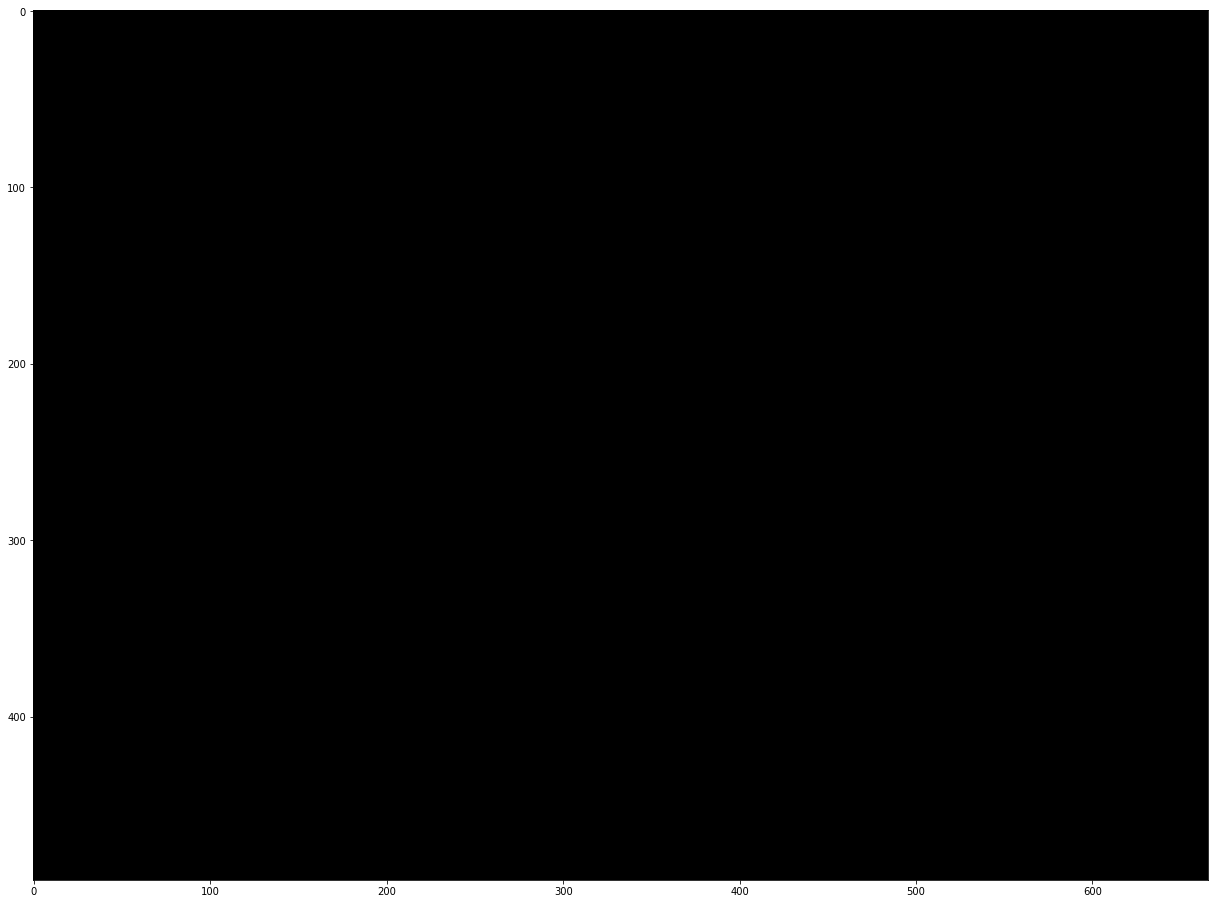

In [37]:
tagger = spriteboard()
clip = VideoFileClip('/home/strider/Code/robotron/resources/video/clip.flv')
#subclip = clip.subclip(0, 10)
#tagged = subclip.fl_image(tagger.markEnemies)
#tagged.ipython_display(width=400, audio=False)

frame = clip.get_frame(113)
%time ds = imresize(frame, size=(720, 1280), interp='nearest')
%time crop = ds[115:608, 309:975]
%time gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
%time ret,thresh = cv2.threshold(gray,10,255,0)
%time result = tagger.markEnemies(thresh)

imshow(result, cmap="gray")